In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk import ngrams, FreqDist
from nltk.corpus import stopwords
from pprint import pprint
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [3]:
#read file line by line
def read_lines(filename):
    with open(filename,'r') as fin:
        return fin.readlines()

In [4]:
# group lines of one verse together
def group_lines(lines):
    songs = []
    index_of_last_new_line = -1
    for i,line in enumerate(lines):
        if line == '\n':
            songs.append(' '.join(lines[(index_of_last_new_line+1):i]))
            index_of_last_new_line = i
    return songs

In [5]:
lines = read_lines('data/kanye_verses.txt')

In [6]:
songs = group_lines(lines)

In [7]:
songs = [s.replace('\n','') for s in songs]

In [8]:
def tokenize_song(song):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(song)

In [9]:
tokenized_songs = [tokenize_song(s) for s in songs]

In [10]:
len(tokenized_songs)

363

In [11]:
def freq_counter(song,ngram_size,most_common_size):
    most_common_ngrams = FreqDist(ngrams(song, ngram_size)).most_common(most_common_size)
    most_common_ngrams = [(' '.join(tuple_),count) for tuple_,count in most_common_ngrams]
    return most_common_ngrams

In [12]:
def remove_stop_words(song):
    stop_words = set(stopwords.words('english'))
    return [w for w in song if not w in stop_words]

In [13]:
most_common_size = 5

In [14]:
songs_freq_record = {i:{n:freq_counter(song,n,most_common_size) for n in range(1,4)} for i,song in enumerate(tokenized_songs)}

`songs_freq_record` has most common words and phrases of each verse. Stopwords included

In [15]:
pprint(songs_freq_record)

{0: {1: [('the', 8), ('I', 8), ('in', 4), ('up', 3), ('like', 3)],
     2: [('I threw', 2),
         ('threw suicides', 2),
         ('suicides on', 2),
         ('on the', 2),
         ('I m', 2)],
     3: [('I threw suicides', 2),
         ('threw suicides on', 2),
         ('suicides on the', 2),
         ('Let the suicide', 1),
         ('the suicide doors', 1)]},
 1: {1: [('I', 7), ('my', 6), ('you', 5), ('What', 5), ('m', 4)],
     2: [('I m', 4),
         ('What s', 4),
         ('ain t', 2),
         ('Cause I', 2),
         ('She said', 1)],
     3: [('She said Ye', 1),
         ('said Ye can', 1),
         ('Ye can we', 1),
         ('can we get', 1),
         ('we get married', 1)]},
 2: {1: [('I', 14), ('a', 9), ('the', 8), ('at', 5), ('m', 5)],
     2: [('I m', 5),
         ('m talking', 2),
         ('get money', 2),
         ('I just', 2),
         ('he s', 2)],
     3: [('I m talking', 2),
         ('Break records at', 1),
         ('records at Louis', 1),
         ('at

       3: [('They say people', 1),
           ('say people in', 1),
           ('people in your', 1),
           ('in your life', 1),
           ('your life for', 1)]},
 130: {1: [('you', 4), ('to', 2), ('your', 2), ('a', 2), ('I', 2)],
       2: [('Trying to', 1),
           ('to sneak', 1),
           ('sneak upstairs', 1),
           ('upstairs to', 1),
           ('to your', 1)],
       3: [('Trying to sneak', 1),
           ('to sneak upstairs', 1),
           ('sneak upstairs to', 1),
           ('upstairs to your', 1),
           ('to your apartment', 1)]},
 131: {1: [('the', 25), ('a', 22), ('and', 18), ('I', 14), ('to', 14)],
       2: [('in a', 6),
           ('in the', 4),
           ('a nigga', 4),
           ('Let s', 3),
           ('and the', 3)],
       3: [('No he didn', 2),
           ('he didn t', 2),
           ('I can t', 2),
           ('she ain t', 2),
           ('club in a', 2)]},
 132: {1: [('you', 8), ('me', 7), ('the', 6), ('I', 5), ('that', 4)],
       2: [

       3: [('I got a', 2),
           ('got a big', 2),
           ('a big ego', 2),
           ('my big eheheh', 2),
           ('big eheheh Ego', 2)]},
 263: {1: [('I', 12), ('you', 9), ('a', 5), ('yourself', 4), ('so', 4)],
       2: [('yourself I', 2),
           ('I know', 2),
           ('I m', 2),
           ('I mean', 2),
           ('I could', 2)],
       3: [('On a scale', 1),
           ('a scale of', 1),
           ('scale of one', 1),
           ('of one to', 1),
           ('one to ten', 1)]},
 264: {1: [('I', 8), ('the', 4), ('s', 4), ('in', 3), ('got', 3)],
       2: [('I got', 3),
           ('in the', 2),
           ('her I', 2),
           ('got them', 2),
           ('Ye is', 1)],
       3: [('I got them', 2),
           ('Ye is in', 1),
           ('is in the', 1),
           ('in the buliding', 1),
           ('the buliding let', 1)]},
 265: {1: [('I', 15), ('the', 11), ('my', 8), ('superman', 3), ('a', 3)],
       2: [('my head', 3),
           ('I got', 2),
    

In [16]:
songs_freq_record_without_stop_words = {i: freq_counter(remove_stop_words(song),1,most_common_size) for i,song in enumerate(tokenized_songs)}

`songs_freq_record_without_stop_words` has most common word of each verse. Stopwords not included

In [17]:
songs_freq_record_without_stop_words

{0: [('I', 8), ('like', 3), ('level', 3), ('threw', 2), ('suicides', 2)],
 1: [('I', 7), ('What', 5), ('said', 2), ('married', 2), ('like', 2)],
 2: [('I', 14), ('talking', 5), ('home', 2), ('got', 2), ('business', 2)],
 3: [('I', 4), ('reputation', 4), ('round', 3), ('shit', 3), ('girl', 2)],
 4: [('I', 8), ('hey', 5), ('first', 4), ('remember', 3), ('But', 3)],
 5: [('I', 3), ('like', 2), ('No', 2), ('It', 2), ('something', 2)],
 6: [('I', 11), ('want', 5), ('get', 3), ('She', 3), ('even', 3)],
 7: [('I', 2), ('nigga', 2), ('racism', 2), ('That', 2), ('want', 2)],
 8: [('I', 20), ('know', 7), ('niggas', 7), ('new', 6), ('slaves', 6)],
 9: [('I', 12), ('wait', 4), ('And', 3), ('could', 3), ('need', 2)],
 10: [('And', 3), ('Before', 3), ('somebody', 2), ('first', 2), ('When', 2)],
 11: [('could', 3), ('somebody', 2), ('first', 2), ('tried', 2), ('And', 2)],
 12: [('He', 3), ('yeah', 3), ('get', 2), ('baby', 2), ('I', 2)],
 13: [('black', 11), ('I', 3), ('My', 2), ('see', 2), ('come', 2

In [18]:
flat_tokenzied_songs = [w for song in tokenized_songs for w in song]

In [19]:
len(flat_tokenzied_songs)

54380

In [20]:
freq_record_of_all_songs = {n:freq_counter(flat_tokenzied_songs,n,most_common_size) for n in range(1,4)}

`freq_record_of_all_songs` has most common words and phrases of all dataset. Stopwords included

In [21]:
freq_record_of_all_songs

{1: [('I', 2586), ('the', 1876), ('you', 1170), ('a', 998), ('to', 969)],
 2: [('I m', 523),
  ('don t', 262),
  ('ain t', 247),
  ('in the', 194),
  ('it s', 147)],
 3: [('I don t', 78),
  ('I ain t', 70),
  ('I can t', 42),
  ('you ain t', 34),
  ('don t know', 33)]}

In [22]:
freq_record_of_all_songs_without_stop_words = freq_counter(remove_stop_words(flat_tokenzied_songs),1,most_common_size)

`freq_record_of_all_songs_without_stop_words` has most common words of all dataset. Stopwords not included

In [23]:
freq_record_of_all_songs_without_stop_words

[('I', 2586), ('like', 480), ('And', 457), ('got', 327), ('know', 323)]

In [41]:
wordcloud = WordCloud().generate(' '.join(flat_tokenzied_songs))

(-0.5, 399.5, 199.5, -0.5)

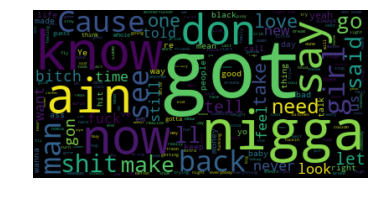

In [43]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## NER

In [25]:
def get_name_entities(text):
    chunked = ne_chunk(pos_tag(text))
    prev = None
    continuous_chunk = []
    current_chunk = []
    for i in chunked:
            if type(i) == Tree:
                    current_chunk.append(" ".join([token for token, pos in i.leaves()]))
            elif current_chunk:
                    named_entity = " ".join(current_chunk)
                    if named_entity not in continuous_chunk:
                            continuous_chunk.append(named_entity)
                            current_chunk = []
            else:
                    continue
    return continuous_chunk

In [26]:
name_entities_in_songs = {i:get_name_entities(song) for i,song in enumerate(tokenized_songs)}

`name_entities_in_songs` has name entities of all songs. Blank list means no entity present

In [27]:
name_entities_in_songs

{0: ['Def Jam', 'Tell', 'Turn', 'Don', 'Dalí', 'Don Niggas'],
 1: ['Ye',
  'Look',
  'Come',
  'Bougie',
  'French',
  'France',
  'Kate',
  'Ashley',
  'Gucci',
  'Louis',
  'Margiela Doctors',
  'Paris'],
 2: ['Break',
  'Louis',
  'Gucci My',
  'Bow',
  'American',
  'Paris',
  'Eiffel',
  'George',
  'Spike Lee',
  'Master P',
  'MTV',
  'TC',
  'Tom Cruise',
  'Pompeii',
  'Elvis',
  'Israelian',
  'Bar Refaeli',
  'Gisele',
  'Brazilian Went',
  'Suicide'],
 3: ['Rock Forever', 'Dutty'],
 4: ['Step', 'Romey Romey Rome'],
 5: ['Coke', 'Sunglasses', 'Advil', 'Who', 'Kiki Shepard', 'No', 'Love'],
 6: ['Tribeca'],
 7: ['Clean', 'Don', 'Bentley Fur', 'Alexander Wang New'],
 8: ['Bobby Boucher',
  'Throw',
  'Ye Y',
  'New',
  'DEA Teamed',
  'Hamptons Braggin',
  'Hampton',
  'Hampton Came',
  'Hampton Hampton'],
 9: [],
 10: [],
 11: [],
 12: ['Jay', 'Beyoncé', 'Gotta', 'Main'],
 13: ['Middle America', 'Catholics', 'Chiraq'],
 14: ['Fuck', 'Come', 'Ready'],
 15: ['Mike',
  'Mekhi Phi

In [28]:
all_name_entities = [ne for key in name_entities_in_songs.keys() for ne in name_entities_in_songs[key]]

In [29]:
len(all_name_entities)

1814

In [30]:
all_name_entities

['Def Jam',
 'Tell',
 'Turn',
 'Don',
 'Dalí',
 'Don Niggas',
 'Ye',
 'Look',
 'Come',
 'Bougie',
 'French',
 'France',
 'Kate',
 'Ashley',
 'Gucci',
 'Louis',
 'Margiela Doctors',
 'Paris',
 'Break',
 'Louis',
 'Gucci My',
 'Bow',
 'American',
 'Paris',
 'Eiffel',
 'George',
 'Spike Lee',
 'Master P',
 'MTV',
 'TC',
 'Tom Cruise',
 'Pompeii',
 'Elvis',
 'Israelian',
 'Bar Refaeli',
 'Gisele',
 'Brazilian Went',
 'Suicide',
 'Rock Forever',
 'Dutty',
 'Step',
 'Romey Romey Rome',
 'Coke',
 'Sunglasses',
 'Advil',
 'Who',
 'Kiki Shepard',
 'No',
 'Love',
 'Tribeca',
 'Clean',
 'Don',
 'Bentley Fur',
 'Alexander Wang New',
 'Bobby Boucher',
 'Throw',
 'Ye Y',
 'New',
 'DEA Teamed',
 'Hamptons Braggin',
 'Hampton',
 'Hampton Came',
 'Hampton Hampton',
 'Jay',
 'Beyoncé',
 'Gotta',
 'Main',
 'Middle America',
 'Catholics',
 'Chiraq',
 'Fuck',
 'Come',
 'Ready',
 'Mike',
 'Mekhi Phife',
 'Rose',
 'Jesus',
 'Free Bump',
 'Derrick Rose',
 'Keef King Louie',
 'Chi',
 'Ain',
 'Chi',
 'Chick',
 

In [31]:
most_common_ne = freq_counter(all_name_entities,1,10)

In [32]:
most_common_ne

[('Don', 28),
 ('Niggas', 20),
 ('Cause', 20),
 ('Tell', 15),
 ('Chi', 14),
 ('Jay', 13),
 ('Jesus', 12),
 ('Kanye', 12),
 ('Yeezy', 12),
 ('Baby', 11)]

## Sentiment Analysis

In [33]:
def sentiment_of_sentence(sentence):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(sentence)

In [34]:
sentiment_of_songs = {i:sentiment_of_sentence(song) for i,song in enumerate(songs)}

`sentiment_of_songs` has compound sentiment score of each verse

In it `neg`,`pos`,`neu` tells portion of sentence which falls into each catogery. `compound` is the final sentiment score which range in `[-1,1]`

In [35]:
sentiment_of_songs

{0: {'neg': 0.153, 'neu': 0.71, 'pos': 0.137, 'compound': -0.6658},
 1: {'neg': 0.097, 'neu': 0.86, 'pos': 0.043, 'compound': -0.8605},
 2: {'neg': 0.116, 'neu': 0.814, 'pos': 0.07, 'compound': -0.9499},
 3: {'neg': 0.311, 'neu': 0.636, 'pos': 0.053, 'compound': -0.99},
 4: {'neg': 0.224, 'neu': 0.764, 'pos': 0.012, 'compound': -0.9869},
 5: {'neg': 0.154, 'neu': 0.768, 'pos': 0.078, 'compound': -0.8973},
 6: {'neg': 0.099, 'neu': 0.826, 'pos': 0.075, 'compound': 0.2709},
 7: {'neg': 0.14, 'neu': 0.705, 'pos': 0.155, 'compound': -0.3495},
 8: {'neg': 0.232, 'neu': 0.748, 'pos': 0.02, 'compound': -0.9967},
 9: {'neg': 0.051, 'neu': 0.87, 'pos': 0.079, 'compound': 0.1027},
 10: {'neg': 0.02, 'neu': 0.865, 'pos': 0.116, 'compound': 0.8296},
 11: {'neg': 0.086, 'neu': 0.844, 'pos': 0.071, 'compound': -0.2732},
 12: {'neg': 0.091, 'neu': 0.872, 'pos': 0.038, 'compound': -0.8111},
 13: {'neg': 0.133, 'neu': 0.796, 'pos': 0.071, 'compound': -0.8689},
 14: {'neg': 0.439, 'neu': 0.561, 'pos': 0

In [36]:
sentiment_label_of_songs = ['Positive' if sentiment_of_songs[key]['compound']>=0.3 else 'Negative' if sentiment_of_songs[key]['compound']<=-0.3 else 'Neutral' for key in sentiment_of_songs.keys()]

In [37]:
for i in ['Positive','Negative','Neutral']:
    print("Number|Percentage of {} songs {}|{}".format(i,sentiment_label_of_songs.count(i),float(sentiment_label_of_songs.count(i))/len(sentiment_label_of_songs)))

Number|Percentage of Positive songs 149|0.41046831955922863
Number|Percentage of Negative songs 175|0.4820936639118457
Number|Percentage of Neutral songs 39|0.10743801652892562


In [38]:
all_the_compound_scores = [sentiment_of_songs[key]['compound'] for key in sentiment_of_songs.keys()]

(array([100.,  40.,  24.,  18.,  11.,  11.,  19.,  15.,  35.,  90.]),
 array([-9.9670e-01, -7.9745e-01, -5.9820e-01, -3.9895e-01, -1.9970e-01,
        -4.5000e-04,  1.9880e-01,  3.9805e-01,  5.9730e-01,  7.9655e-01,
         9.9580e-01]),
 <a list of 10 Patch objects>)

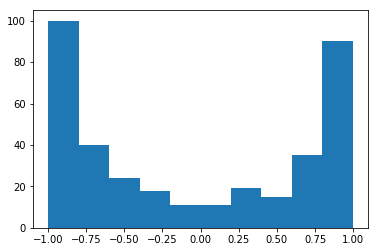

In [39]:
plt.hist(all_the_compound_scores)